In [1]:
import pandas as pd
# Replace 'cleaned-dataset.csv' with the actual file path
df = pd.read_csv('Cleaned Dataset.csv')

# Display the first few rows of the DataFrame
df.head()

,Employment,Age,Gender,MonthlyExpenses,ClothesExpenses,PriceImportance,QualityImportance,StyleImportance,BrandImageImportance,LocationImportance,PurchasedClothingTypes,PreferredShoppingPlatform,PreferredClothingBrand
0,No,19,Male,400,300,Very important,Not important,Not important,Not important,Not important,Sports wear,In-store shopping,Brands Outlet
1,Yes,22,Female,450,300,Very important,Moderately important,Very important,Very important,Very important,Casual wear,Online shopping,H&M
2,Yes,22,Male,1300,250,Not important,Very important,Moderately important,Very important,Very important,Formal wear,Both,Uniqlo
3,No,21,Female,500,50,Very important,Very important,Not important,Not important,Moderately important,Casual wear,Online shopping,H&M
4,No,23,Female,900,300,Very important,Moderately important,Very important,Very important,Very important,Casual wear,Online shopping,H&M


In [2]:
df.describe()

,Age,MonthlyExpenses,ClothesExpenses
count,500.000000,500.000000,500.000000
mean,20.652000,848.558000,233.138000
std,3.581697,461.113954,95.715191
min,13.000000,20.000000,30.000000
25%,19.000000,465.000000,150.000000
50%,21.000000,780.000000,221.000000
75%,22.000000,1300.000000,300.000000
max,44.000000,3000.000000,550.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employment                 500 non-null    object
 1   Age                        500 non-null    int64 
 2   Gender                     500 non-null    object
 3   MonthlyExpenses            500 non-null    int64 
 4   ClothesExpenses            500 non-null    int64 
 5   PriceImportance            500 non-null    object
 6   QualityImportance          500 non-null    object
 7   StyleImportance            500 non-null    object
 8   BrandImageImportance       500 non-null    object
 9   LocationImportance         500 non-null    object
 10  PurchasedClothingTypes     500 non-null    object
 11  PreferredShoppingPlatform  500 non-null    object
 12  PreferredClothingBrand     500 non-null    object
dtypes: int64(3), object(10)
memory usage: 50.9+ KB


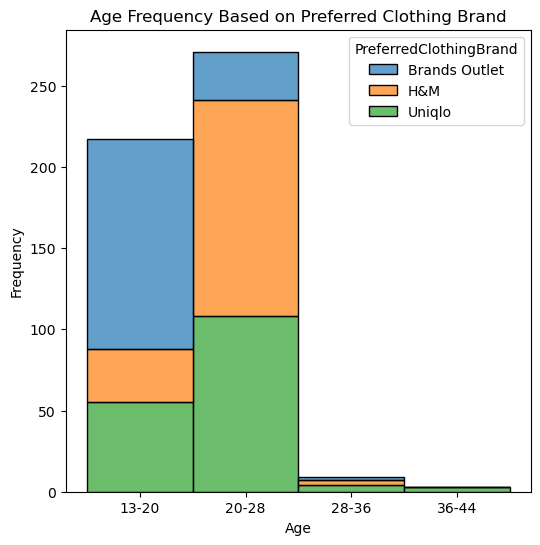

In [4]:
#Numerical Data: Age
# 1. Info stat = Mode/Frequency
# 2. Visualization tool = Stacked bar chart
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the number of bins
num_bins = 4

# Create histogram using Seaborn
plt.figure(figsize=(6, 6))
ax = sns.histplot(data=df, x='Age', hue='PreferredClothingBrand', 
                  bins=num_bins, multiple='stack', palette='tab10', 
                  edgecolor='black', alpha=0.7)

# Customize x-axis ticks and labels
bin_edges = np.histogram_bin_edges(df['Age'], bins=num_bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
ax.set_xticks(bin_centers)
ax.set_xticklabels([f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' 
                    for i in range(num_bins)])

# Set labels and title
plt.title('Age Frequency Based on Preferred Clothing Brand')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show plot
plt.show()


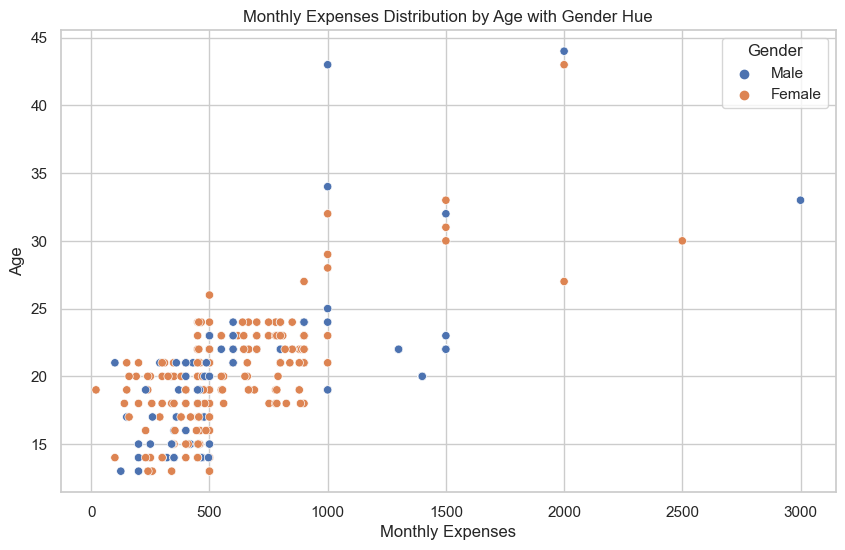

In [5]:
#Numerical Data: MonthlyExpenses,Age
# 1. Info stat = Correlation
# 2. Visualization tool = Scatter plot
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plotting the scatter plot with hue and alpha
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='MonthlyExpenses', y='Age', hue='Gender', 
                data=df, alpha=1.0)  

# Adding labels and title 
plt.xlabel('Monthly Expenses')
plt.ylabel('Age') 
plt.title('Monthly Expenses Distribution by Age with Gender Hue')

# Display the plot 
plt.show()


<Figure size 1000x1000 with 0 Axes>

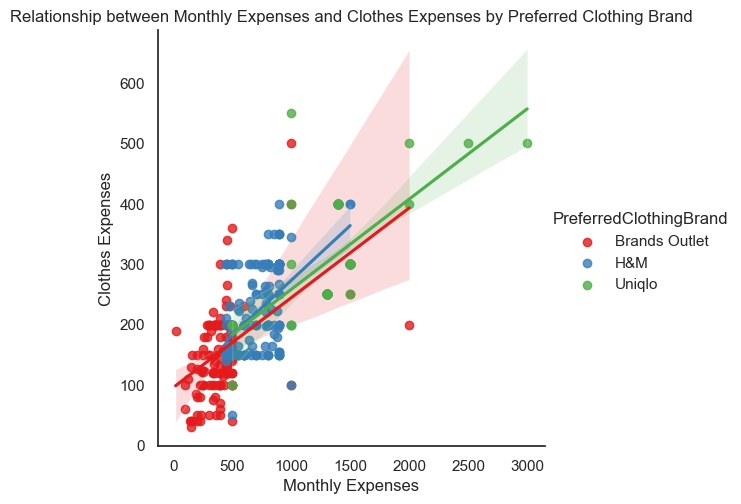

In [6]:
#Numerical Data: MonthlyExpenses,ClothesExpenses
# 1. Info stat = Correlation
# 2. Visualization tool = Scatter plot, 
#regression line
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style without grid
sns.set(style="white")

# Create scatter plot with regression lines for each brand
plt.figure(figsize=(10, 10))
sns.lmplot(data=df, x='MonthlyExpenses', y='ClothesExpenses', 
           hue='PreferredClothingBrand', palette="Set1")

plt.title('Relationship between Monthly Expenses and Clothes Expenses by Preferred Clothing Brand')
plt.xlabel('Monthly Expenses')
plt.ylabel('Clothes Expenses')

plt.show()

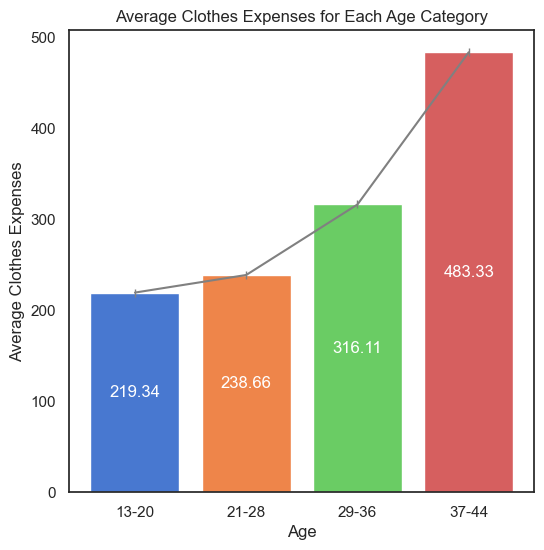

In [7]:
#Numerical Data: ClothesExpenses,Age
# 1. Info stat = Average
# 2. Visualization tool = Bar chart
import seaborn as sns
import matplotlib.pyplot as plt
# Set the style
sns.set(style="white")

# Group the data into bins
bins = 4
labels = ['13-20', '21-28', '29-36', '37-44']
df['Age Category'] = pd.cut(df['Age'], bins=bins, 
                            labels=labels)

# Calculate the average clothing expenses for each age category
average_expenses_by_age = df.groupby('Age Category') ['ClothesExpenses'].mean().reset_index()

# Create a color palette
colors = sns.color_palette('muted', n_colors=len(average_expenses_by_age))

# Create a bar chart with different colors
plt.figure(figsize=(6, 6))
bars = plt.bar(average_expenses_by_age['Age Category'], 
               average_expenses_by_age['ClothesExpenses'], color=colors)

# Annotate each bar with the corresponding average clothing expenses inside the bar
for bar, expense in zip(bars, average_expenses_by_age['ClothesExpenses']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, 
             f'{expense:.2f}', ha='center', va='center', color='white')
    
# Add a continuous line connecting the top center of each bar
x_positions = [bar.get_x() + bar.get_width() / 2 for bar in bars]
y_positions = [bar.get_height() for bar in bars]
plt.plot(x_positions, y_positions, marker='|', linestyle='-', color='grey')
plt.xlabel('Age')
plt.ylabel('Average Clothes Expenses')
plt.title('Average Clothes Expenses for Each Age Category')
plt.show()


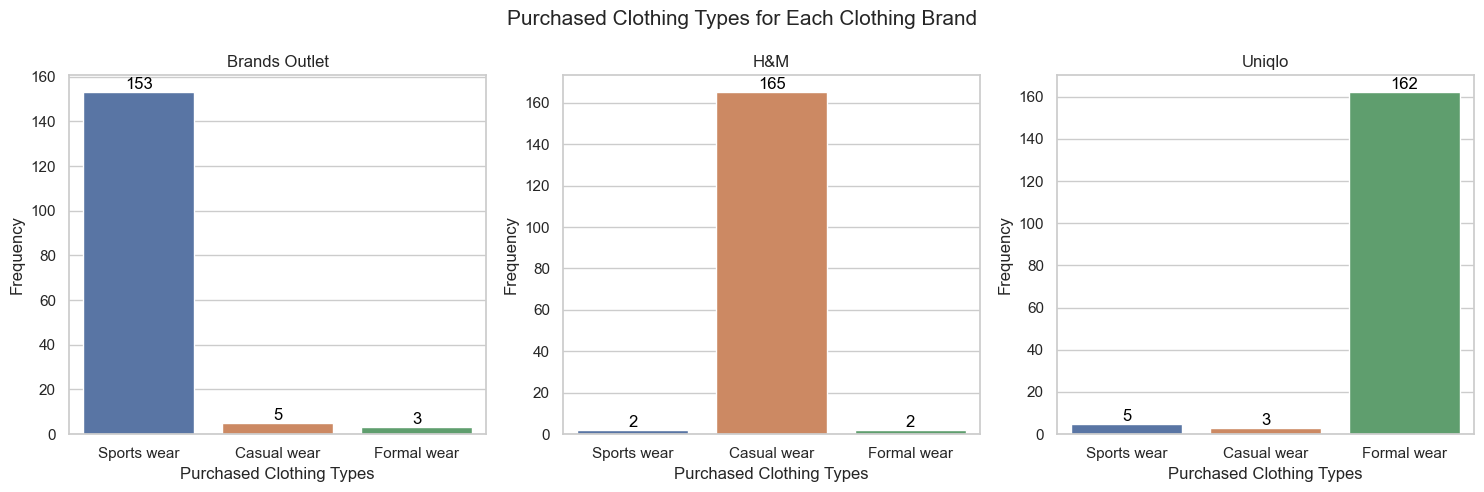

In [8]:
#Categorical Data: PurchasedClothingTypes, 
#PreferredClothingBrand
# 1. Info stat = Mode/Frequency
# 2. Visualization tool = Grouped Bar Graph
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Set the style
sns.set(style="whitegrid")

# Create subplots for each 'PreferredClothingBrand'
brands = df['PreferredClothingBrand'].unique()
num_brands = len(brands)
fig, axes = plt.subplots(nrows=1, ncols=num_brands, 
                         figsize=(15, 5))

# Define the order of bars for each subplot
order = df['PurchasedClothingTypes'].unique()

# Iterate through each brand and create a bar plot
for i, brand in enumerate(brands):
    ax = axes[i]
    brand_data = df[df['PreferredClothingBrand'] == brand]
    bars = sns.countplot(data=brand_data, x='PurchasedClothingTypes', 
                         ax=ax, order=order)
    ax.set_title(f'{brand}')
    ax.set_xlabel('Purchased Clothing Types')
    ax.set_ylabel('Frequency')

    # Annotate each bar with the corresponding frequency value above the bar
    for bar in bars.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height,f'{int(height)}',
            ha='center',va='bottom',fontsize=12,color='black')

# Set the figure title
fig.suptitle("Purchased Clothing Types for Each Clothing Brand", 
             fontsize=15)

# Adjust layout to prevent overlapping
plt.tight_layout() 

# Show plot
plt.show()

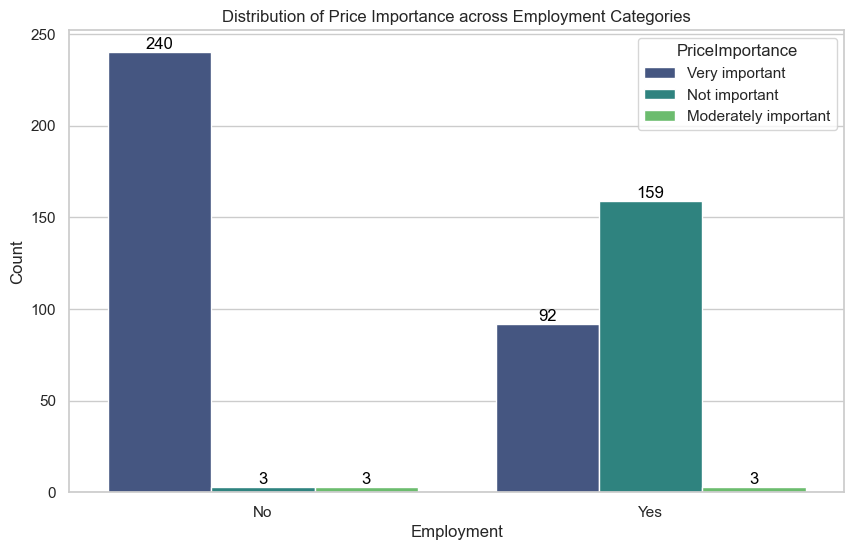

In [9]:
#Categorical Data: PriceImportance,Employment
# 1. Info stat = Mode/Frequency
# 2. Visualization tool = Grouped Bar Graph
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
sns.countplot(x='Employment', hue='PriceImportance', data=df, 
              palette='viridis')

plt.title('Distribution of Price Importance across Employment Categories')
plt.xlabel('Employment')
plt.ylabel('Count')

# Adding labels to each bar
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), 
             '%d' % int(p.get_height()),
             fontsize=12, color='black', ha='center', va='bottom')

plt.show()


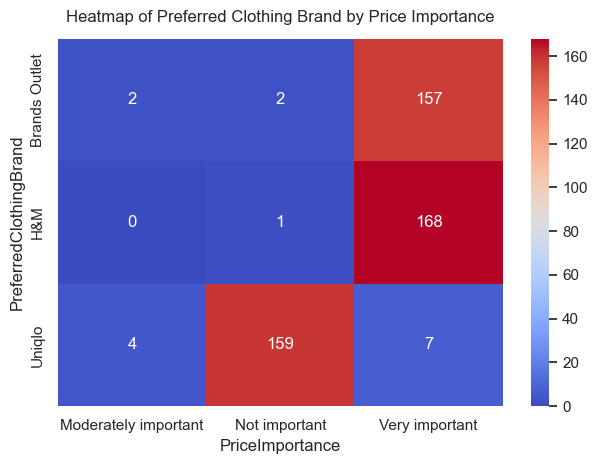

In [10]:
#Categorical Data: Preferred Clothing Brand,
#Brand Image Importance
# 1. Info stat = Mode/Frequency
# 2. Visualization tool = Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
crosstab = pd.crosstab(df['PreferredClothingBrand'], 
                       df['PriceImportance'])

# Set up the heatmap with adjusted font size
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm', 
            annot_kws={"size": 12}) 

# Set labels and title with adjusted font size
plt.xlabel('PriceImportance', fontsize=12)  
plt.ylabel('PreferredClothingBrand', fontsize=12)  
plt.title('Heatmap of Preferred Clothing Brand by Price Importance', 
          fontsize=12, pad=12)
  

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



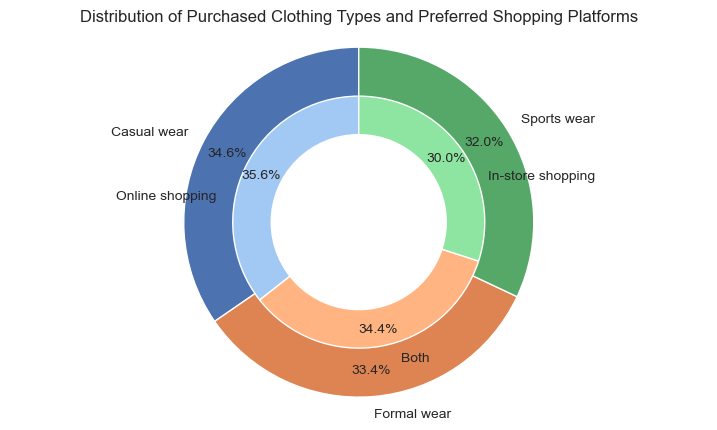

In [11]:
#Categorical Data: PurchasedClothingTypes,
#PreferredShoppingPlatform
# 1. Info stat = Percentage
# 2. Visualization tool = Pie Donut Chart
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Choose the first categorical variable for the outer donut chart
outer_categorical_variable = 'PurchasedClothingTypes'
inner_categorical_variable = 'PreferredShoppingPlatform'

# Get value counts for the outer donut chart
outer_counts = df[outer_categorical_variable].value_counts()

# Get value counts for the inner donut chart
inner_counts = df[inner_categorical_variable].value_counts()

# Set the "muted" color palette from seaborn
outer_colors = sns.color_palette('deep', n_colors=len(outer_counts))
inner_colors = sns.color_palette('pastel', n_colors=len(inner_counts))

# Set smaller font size for labels and percentages
font_size = 10

# Create outer donut chart
plt.figure(figsize=(9, 5))
outer_pie, outer_texts, outer_autotexts = plt.pie(outer_counts, labels=outer_counts.index, 
autopct='%1.1f%%', textprops={'fontsize': font_size}, colors=outer_colors, startangle=90, 
wedgeprops=dict(width=0.6), pctdistance=0.85)  

# Create inner donut chart
inner_pie, inner_texts, inner_autotexts = plt.pie(inner_counts, radius=0.72, 
labels=inner_counts.index, autopct='%1.1f%%', textprops={'fontsize': font_size}, colors=inner_colors, 
startangle=90, wedgeprops=dict(width=0.6), pctdistance=0.86)  

# Draw a white circle at the center to create a double donut chart
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Manually adjust the positions of existing labels
for text in outer_texts + inner_texts:
    # Get the current x, y position of the label
    x, y = text.get_position()

    # Adjust the positions as needed
    if text.get_text() == 'In-store shopping':
        text.set_position((x + 0.1, y - 0.2))
    elif text.get_text() == 'Online shopping':
        text.set_position((x - 0.1, y - 0.2))
    elif text.get_text() == 'Both':
        text.set_position((x + 0.1, y ))

# Set aspect ratio to be equal to ensure a circular double donut
plt.axis('equal')

# Set title at the center
plt.title(f'Distribution of Purchased Clothing Types and Preferred Shopping Platforms', fontsize=12, loc='center')

plt.show()
